In [25]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from math import pi
from math import e
from numpy import sin
from numpy import cos
from cmath import sqrt
from scipy import special
from numpy import exp
from scipy import optimize
from numpy import log
from numpy import tanh
from scipy.optimize import fsolve
from scipy.optimize import brentq
from numpy import conj
from numpy import cosh

In [19]:
steps = 100
convergence = 100
w_list = np.linspace(-10.0, 10.0, num=steps)
T_list = np.linspace(0.001, 2.0, num=steps)
tol = 0.001

In [11]:
def Greal_R(w,sigma,U):
    tol = 0.00001
    result = 0*1j
    factor = w + U/2 - sigma
    result_positive = factor / 2 + 0.5 * sqrt(factor ** 2 - 4)
    #print(result_positive)
    result_negative = factor / 2 - 0.5 * sqrt(factor ** 2 - 4)
    #print(result_negative)
    if result_positive.imag < (-1*tol):
        result = result_positive
    elif result_negative.imag < (-1*tol):
        result = result_negative
    else:
        if abs(result_positive) < 1:
            result = result_positive
        elif abs(result_negative) < 1:
            result = result_negative
        else:
            result = -1
            #print('hey weirdo.')
    return result

def Greal_0(w,sigma,U):
    return 1 / (1/Greal_R(w,sigma,U) + sigma)

def Greal_new(w,sigma,U):
    return 0.5 * Greal_0(w,sigma,U) + 0.5 * 1/(1/Greal_0(w,sigma,U) - U)

In [80]:
def get_gf(w,U):
    retardedreal = 0*1j
    #retardedimag_list = []
    tol = 0.001
    sigma_temp = 0.0
    old_sigma = sigma_temp
    retarded = Greal_R(w, sigma_temp, U)
    #print(retarded)
    nonint = 1/(1/retarded + old_sigma)
    new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
    new_sigma = 1 / nonint - 1 / new
    
    for i in range(convergence):
        old_sigma = new_sigma
        retarded = Greal_R(w, old_sigma, U)
        #print(w_list[i],retarded)
        nonint = 1/(1/retarded + old_sigma)
        new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
        new_sigma = 1 / nonint - 1 / new
    #sigma_list.append(new_sigma)
    #print('Sigma = ',sigma_list[i])
    retardedreal = Greal_R(w, new_sigma, U)
    return retardedreal

def get_sigma(w,U):
    retardedreal = 0*1j
    #retardedimag_list = []
    tol = 0.001
    sigma_temp = 0.0
    old_sigma = sigma_temp
    retarded = Greal_R(w, sigma_temp, U)
    #print(retarded)
    nonint = 1/(1/retarded + old_sigma)
    new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
    new_sigma = 1 / nonint - 1 / new
    
    for i in range(convergence):
        old_sigma = new_sigma
        retarded = Greal_R(w, old_sigma, U)
        #print(w_list[i],retarded)
        nonint = 1/(1/retarded + old_sigma)
        new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
        new_sigma = 1 / nonint - 1 / new
    #sigma_list.append(new_sigma)
    #print('Sigma = ',sigma_list[i])
    #retardedreal = Greal_R(w, new_sigma, U)
    return new_sigma


def sigma_0(U,T):
    w_start = -3
    w_stop = 3
    w_interval = (w_stop - w_start) / steps
    e_start = -1.99
    e_stop = 1.99
    e_interval = (e_stop - e_start) / steps
    integral_value = 0
    w = w_start + 0.5 * w_interval
    x = e_start
    
    for i in range(steps):
        inner_integral = 0
        for j in range(steps):
            inner_integral += sqrt(4-x**2)/(2*pi) * 1/3 * (4-x**2) * (-1/pi)**2 * ((1/(w+(U/2)-x-get_sigma(w,U))).imag)**2 * e_interval
            #print(inner_integral)
            x += e_interval
        #print(inner_integral)
        integral_value += 1 / (2*(cosh(w/T)+1)) / T * inner_integral * w_interval
        w += w_interval
        
    return integral_value * e**2 * pi

def thermal(U,T):
    w_start = -3
    w_stop = 3
    w_interval = (w_stop - w_start) / steps
    e_start = -1.99
    e_stop = 1.99
    e_interval = (e_stop - e_start) / steps
    integral_value = 0
    w = w_start + 0.5 * w_interval
    x = e_start
    
    for i in range(steps):
        inner_integral = 0
        for j in range(steps):
            inner_integral += sqrt(4-x**2)/(2*pi) * 1/3 * (4-x**2) * (-1/pi)**2 * ((1/(w+(U/2)-x-get_sigma(w,U))).imag)**2 * e_interval
            x += e_interval
        integral_value += 1 / (2*(cosh(w/T)+1)) / T * w**2 * inner_integral * w_interval
        w += w_interval
        
    return integral_value * e**2 * pi / T

In [83]:
def lorenz(U):
    lorenz_list = []
    T_start = 0.001
    T_end = 2.0
    T_interval = (T_end - T_start) / steps
    T_temp = T_start + 0.5 * T_interval
    for i in range(steps):
        lorenz_list.append(thermal(U,T_temp)/(T_temp * sigma_0(U,T_temp)))
        T_temp += T_interval
    return lorenz_list

In [99]:
lorenz05 = lorenz(0.5)
lorenz05[0] = 0

In [100]:
lorenz1 = lorenz(1.0)
lorenz1[0] = 0
lorenz15 = lorenz(1.5)
lorenz15[0] = 0
lorenz2 = lorenz(2.0)
lorenz2[0] = 0

C:\Users\luoge\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


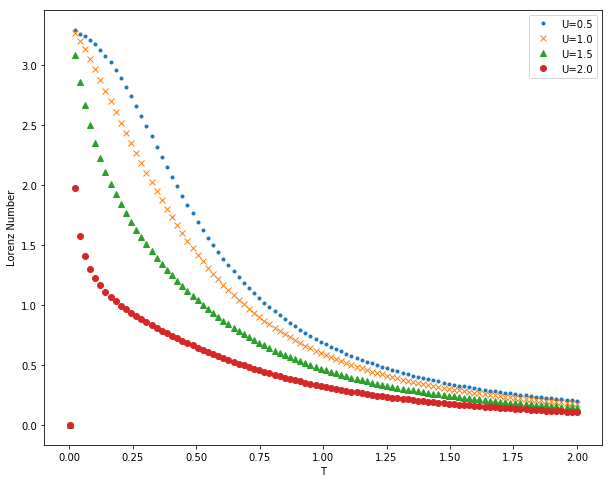

In [101]:
plt.figure(figsize = (10, 8))
plt.ylabel('Lorenz Number')
plt.xlabel('T')
plt.plot(T_list, lorenz05, '.', label = 'U=0.5')
plt.plot(T_list, lorenz1, 'x', label = 'U=1.0')
plt.plot(T_list, lorenz15, '^', label = 'U=1.5')
plt.plot(T_list, lorenz2, 'o', label = 'U=2.0')
plt.legend()
plt.show()